## Import Data ##

In [96]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import *
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

device = "mps" if torch.mps.is_available() else "cpu"
print(device)
import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning)

mps


In [98]:
files = os.listdir()
data = [f for f in files if f.endswith(".csv")]

if data:
    df = pd.read_csv(data[0])
else:
    print("No data files found in the directory.")

df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [100]:
df = df.drop(columns=["Name"])
df = df.drop(columns=["Room Number"])
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal
55497,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal


In [102]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [104]:
#Standardize data, helpful for linear regression and Neural Networks

copy_df = df.copy()

for column in copy_df.columns:
    copy_df[column] = copy_df[column]/copy_df[column].abs().max()
copy_df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,0.337079,1.0,0.714286,0.4,0.946878,0.659693,0.750671,0.25,0.357368,1.0,0.932615,0.75,1.0
1,0.696629,1.0,0.000000,1.0,0.056955,0.834110,0.401555,0.75,0.637616,0.5,0.058760,0.25,0.5
2,0.853933,0.0,0.142857,1.0,0.675246,0.937729,0.137254,0.00,0.529811,0.5,0.672237,0.00,1.0
3,0.314607,0.0,0.857143,0.6,0.306681,0.558032,0.308890,0.75,0.718474,0.0,0.317520,0.25,0.0
4,0.483146,0.0,0.285714,0.4,0.673604,0.526996,0.842583,0.00,0.269848,1.0,0.673315,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,0.471910,0.0,0.857143,0.2,0.255203,0.495860,0.390044,0.25,0.050237,0.0,0.266846,1.00,0.0
55496,0.685393,0.0,0.428571,1.0,0.142388,0.920897,0.795536,0.50,0.596195,0.0,0.144474,0.00,1.0
55497,0.426966,0.0,0.571429,0.8,0.236583,0.459841,0.938132,1.00,0.523475,1.0,0.247439,0.25,0.0
55498,0.483146,1.0,1.000000,0.0,0.009310,0.561849,0.359348,0.75,0.615020,0.0,0.011860,0.25,0.0


In [106]:
def drop():
    global X
    global y
    
    X = copy_df.drop(columns=["Test Results"])
    y = copy_df["Test Results"]

drop()
copy_df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,0.337079,1.0,0.714286,0.4,0.946878,0.659693,0.750671,0.25,0.357368,1.0,0.932615,0.75,1.0
1,0.696629,1.0,0.000000,1.0,0.056955,0.834110,0.401555,0.75,0.637616,0.5,0.058760,0.25,0.5
2,0.853933,0.0,0.142857,1.0,0.675246,0.937729,0.137254,0.00,0.529811,0.5,0.672237,0.00,1.0
3,0.314607,0.0,0.857143,0.6,0.306681,0.558032,0.308890,0.75,0.718474,0.0,0.317520,0.25,0.0
4,0.483146,0.0,0.285714,0.4,0.673604,0.526996,0.842583,0.00,0.269848,1.0,0.673315,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,0.471910,0.0,0.857143,0.2,0.255203,0.495860,0.390044,0.25,0.050237,0.0,0.266846,1.00,0.0
55496,0.685393,0.0,0.428571,1.0,0.142388,0.920897,0.795536,0.50,0.596195,0.0,0.144474,0.00,1.0
55497,0.426966,0.0,0.571429,0.8,0.236583,0.459841,0.938132,1.00,0.523475,1.0,0.247439,0.25,0.0
55498,0.483146,1.0,1.000000,0.0,0.009310,0.561849,0.359348,0.75,0.615020,0.0,0.011860,0.25,0.0


## Data Clean Up ##

In [108]:
stats.zscore(copy_df) #Find outliers

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,-1.098824,0.999136,0.658348,-0.292010,1.552941,0.556494,0.924872,-0.715785,-0.470261,1.222679,1.527229,0.708975,1.224795
1,0.533639,0.999136,-1.525364,1.464101,-1.520947,1.166657,-0.328019,0.702522,0.570250,0.001738,-1.538775,-0.706222,0.002423
2,1.247842,-1.000865,-1.088622,1.464101,0.614696,1.529147,-1.276530,-1.424939,0.169990,0.001738,0.613669,-1.413820,1.224795
3,-1.200853,-1.000865,1.095090,0.293360,-0.658367,0.200854,-0.660570,0.702522,0.870465,-1.219203,-0.630890,-0.706222,-1.219949
4,-0.435636,-1.000865,-0.651879,-0.292010,0.609021,0.092281,1.254723,-1.424939,-0.795211,1.222679,0.617452,1.416574,-1.219949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,-0.486651,-1.000865,1.095090,-0.877380,-0.836179,-0.016640,-0.369329,-0.715785,-1.610589,-1.219203,-0.808684,1.416574,-1.219949
55496,0.482625,-1.000865,-0.215137,1.464101,-1.225854,1.470264,1.085882,-0.006632,0.416462,-1.219203,-1.238038,-1.413820,1.224795
55497,-0.690708,-1.000865,0.221605,0.878730,-0.900494,-0.142644,1.597623,1.411676,0.146464,1.222679,-0.876776,-0.706222,-1.219949
55498,-0.435636,0.999136,1.531833,-1.462751,-1.685518,0.214209,-0.479489,0.702522,0.486357,-1.219203,-1.703329,-0.706222,-1.219949


In [110]:
#Drop outliers
z = np.abs(stats.zscore(copy_df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
copy_df = copy_df.drop(outliers)
copy_df = copy_df.reset_index(drop=True)
copy_df.shape

(55500, 13)

In [112]:
copy_df.isna().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
copy_df = copy_df.dropna() #drop rows with missing values
copy_df = copy_df.reset_index(drop=True)

In [114]:
copy_df.duplicated().sum()

534

In [116]:
copy_df = copy_df.drop_duplicates() #drop duplicate rows
copy_df = copy_df.reset_index(drop=True)

In [286]:
drop()
copy_df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,0.337079,1.0,0.714286,0.4,0.946878,0.659693,0.750671,0.25,0.357368,1.0,0.932615,0.75,1.0
1,0.696629,1.0,0.000000,1.0,0.056955,0.834110,0.401555,0.75,0.637616,0.5,0.058760,0.25,0.5
2,0.853933,0.0,0.142857,1.0,0.675246,0.937729,0.137254,0.00,0.529811,0.5,0.672237,0.00,1.0
3,0.314607,0.0,0.857143,0.6,0.306681,0.558032,0.308890,0.75,0.718474,0.0,0.317520,0.25,0.0
4,0.483146,0.0,0.285714,0.4,0.673604,0.526996,0.842583,0.00,0.269848,1.0,0.673315,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,0.471910,0.0,0.857143,0.2,0.255203,0.495860,0.390044,0.25,0.050237,0.0,0.266846,1.00,0.0
54962,0.685393,0.0,0.428571,1.0,0.142388,0.920897,0.795536,0.50,0.596195,0.0,0.144474,0.00,1.0
54963,0.426966,0.0,0.571429,0.8,0.236583,0.459841,0.938132,1.00,0.523475,1.0,0.247439,0.25,0.0
54964,0.483146,1.0,1.000000,0.0,0.009310,0.561849,0.359348,0.75,0.615020,0.0,0.011860,0.25,0.0


## Statistical Modeling ##

In [120]:
copy_df.describe()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
count,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000,54966.000000
mean,0.579047,0.500237,0.498859,0.499789,0.497663,0.500441,0.493106,0.502142,0.484121,0.499254,0.497699,0.499481,0.499036
std,0.220288,0.500004,0.327099,0.341675,0.289512,0.285833,0.278617,0.352589,0.269281,0.409475,0.285017,0.353260,0.408941
min,0.146067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.038065,0.000000,0.000000,0.000000,0.000000
25%,0.393258,0.000000,0.142857,0.200000,0.244797,0.251537,0.266288,0.250000,0.250998,0.000000,0.249057,0.250000,0.000000
50%,0.584270,1.000000,0.428571,0.600000,0.497809,0.496827,0.475473,0.500000,0.484092,0.500000,0.498113,0.500000,0.500000
75%,0.764045,1.000000,0.714286,0.800000,0.748631,0.746275,0.729925,0.750000,0.716770,1.000000,0.745013,0.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
copy_df.corr()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
Age,1.000000,-0.002510,-0.000031,-0.002800,-0.000877,-0.003225,0.001728,-0.005222,-0.003427,0.004098,-0.000748,-0.006073,-0.006974
Gender,-0.002510,1.000000,-0.000690,0.000746,0.001649,-0.002916,0.003262,-0.003267,0.004939,0.009642,0.001718,0.007855,0.005073
Blood Type,-0.000031,-0.000690,1.000000,-0.004183,-0.000147,-0.004764,-0.000457,-0.001097,-0.000575,-0.004305,-0.000175,0.002778,-0.000717
Medical Condition,-0.002800,0.000746,-0.004183,1.000000,-0.001739,-0.002240,-0.002048,-0.004689,0.005426,-0.001848,-0.001838,-0.003091,0.002538
Date of Admission,-0.000877,0.001649,-0.000147,-0.001739,1.000000,0.007922,0.002249,0.003063,-0.001034,-0.000109,0.999866,-0.009129,-0.002570
Doctor,-0.003225,-0.002916,-0.004764,-0.002240,0.007922,1.000000,-0.003078,0.002637,0.003093,-0.005246,0.007942,0.003923,0.000639
Hospital,0.001728,0.003262,-0.000457,-0.002048,0.002249,-0.003078,1.000000,-0.001234,-0.004035,-0.002093,0.002181,0.004373,-0.004723
Insurance Provider,-0.005222,-0.003267,-0.001097,-0.004689,0.003063,0.002637,-0.001234,1.000000,-0.002448,0.009856,0.003092,-0.002483,-0.001863
Billing Amount,-0.003427,0.004939,-0.000575,0.005426,-0.001034,0.003093,-0.004035,-0.002448,1.000000,-0.002815,-0.001114,-0.004128,-0.002635
Admission Type,0.004098,0.009642,-0.004305,-0.001848,-0.000109,-0.005246,-0.002093,0.009856,-0.002815,1.000000,-0.000192,-0.000411,-0.000602


In [124]:
kstest(X, "norm").pvalue #p-value for each row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

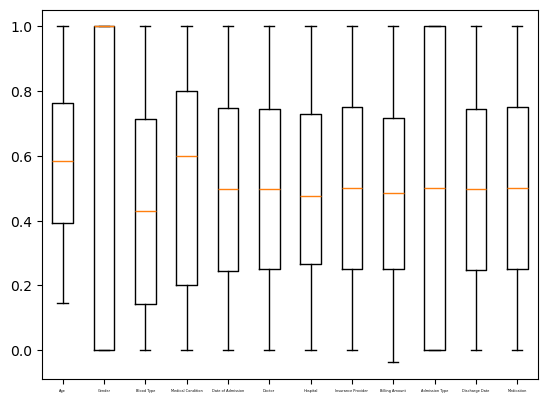

In [126]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=2.5)
plt.show()

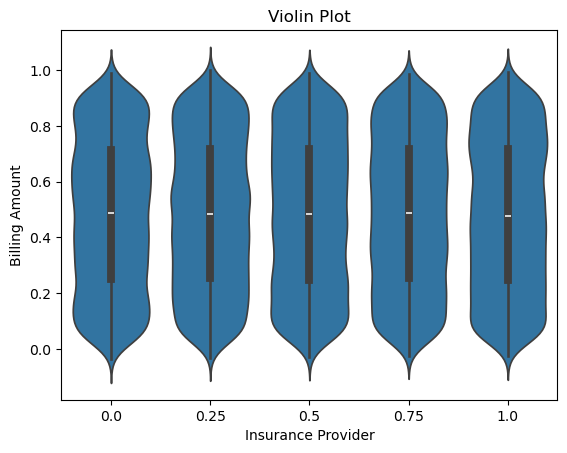

In [282]:
import seaborn as sns

sns.violinplot(x="Insurance Provider", y="Billing Amount", data=copy_df)
plt.title("Violin Plot")
plt.show()

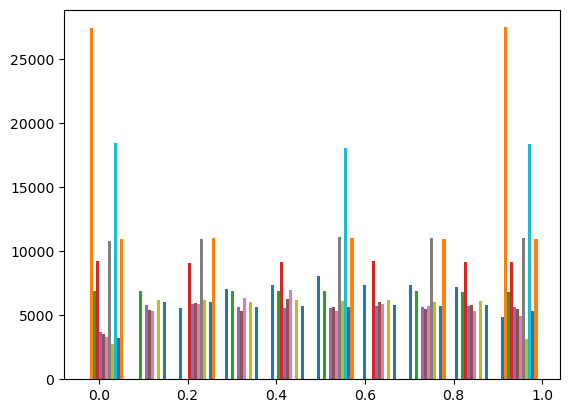

In [272]:
plt.hist(X)
ax.set_xticklabels(X.columns, size=2.5)
plt.show()

## Training Model ##

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [144]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [146]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(38476, 12)
(8245, 12)
(8245, 12)


In [148]:
class dataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(np.array(X), dtype = torch.float32).to(device)
        self.y = torch.tensor(np.array(y), dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [150]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [152]:
train_dataloader = DataLoader(training_data, batch_size = 37, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 37, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 37, shuffle = True)

In [178]:
Hidden_Neurons = 75

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], Hidden_Neurons)
        
        self.hidden_layer1 = nn.Linear(X.shape[1], Hidden_Neurons)
        self.hidden_layer2 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        self.hidden_layer3 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        self.hidden_layer4 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        self.hidden_layer5 = nn.Linear(Hidden_Neurons, Hidden_Neurons)
        
        self.linear = nn.Linear(Hidden_Neurons, 1) #output layer
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        #Forward Propagation
        x = x.to(device)
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [180]:
summary(model, (X.shape[1],), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [1]                       23,775
├─Linear: 1-1                            [75]                      975
├─Linear: 1-2                            [1]                       76
├─Sigmoid: 1-3                           [1]                       --
Total params: 24,826
Trainable params: 24,826
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.07
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [182]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 1e-4)

In [184]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in train_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)

        batch_loss = criterion(prediction, labels)
        
        total_loss_train += batch_loss.item()

        acc = ((prediction).round() == labels).sum().item()

        total_acc_train += acc

        #Back Propagation
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)
        
            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc
        
    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    
    total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__()*100, 4))

    print(f'''Epoch no. {epoch+1} 
    Training Loss: {round(total_loss_train/1000, 4)} 
    Training Accuracy: {round(total_acc_train/training_data.__len__()*100, 4)} 
    Validation Loss: {round(total_loss_val/1000, 4)} 
    Validation Accuracy: {round(total_acc_val/validation_data.__len__()*100, 4)}''')

    print("="*50)

Epoch no. 1 
    Training Loss: 69.2422 
    Training Accuracy: 33.3091 
    Validation Loss: 14.9072 
    Validation Accuracy: 33.9721
Epoch no. 2 
    Training Loss: 69.2395 
    Training Accuracy: 33.7925 
    Validation Loss: 14.9065 
    Validation Accuracy: 33.5476
Epoch no. 3 
    Training Loss: 69.2395 
    Training Accuracy: 33.5638 
    Validation Loss: 14.9068 
    Validation Accuracy: 33.681
Epoch no. 4 
    Training Loss: 69.2393 
    Training Accuracy: 33.582 
    Validation Loss: 14.9066 
    Validation Accuracy: 34.1419
Epoch no. 5 
    Training Loss: 69.2389 
    Training Accuracy: 33.6521 
    Validation Loss: 14.9071 
    Validation Accuracy: 33.7174
Epoch no. 6 
    Training Loss: 69.2392 
    Training Accuracy: 33.5586 
    Validation Loss: 14.9077 
    Validation Accuracy: 33.5476
Epoch no. 7 
    Training Loss: 69.2394 
    Training Accuracy: 33.5534 
    Validation Loss: 14.907 
    Validation Accuracy: 33.6689
Epoch no. 8 
    Training Loss: 69.2392 
    Traini

In [186]:
model = MyModel().to(device)

## Post-Training Analysis ##

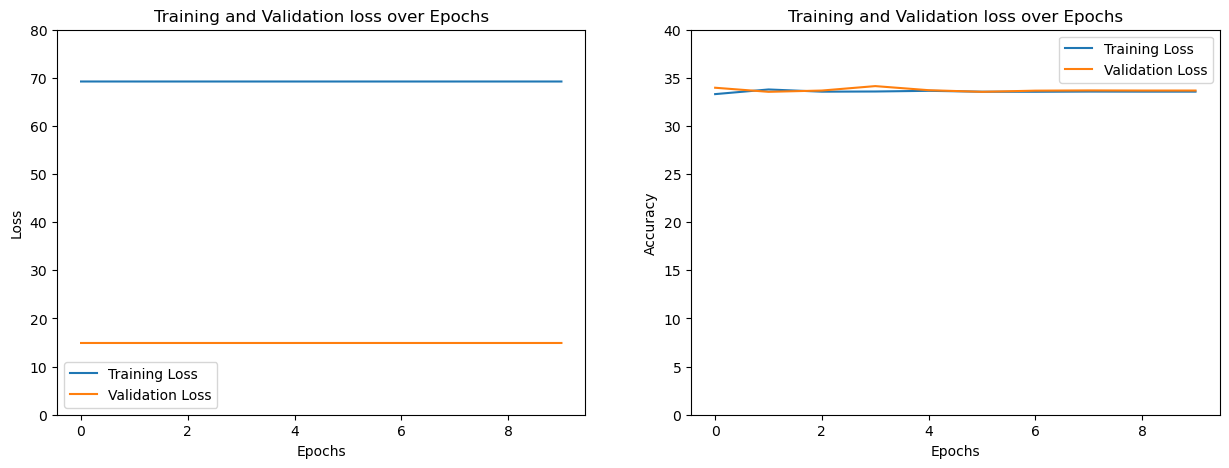

In [194]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_validation_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,80])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = "Training Loss")
axs[1].plot(total_acc_validation_plot, label = "Validation Loss")
axs[1].set_title("Training and Validation loss over Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([0,40])
axs[1].legend()

plt.show()

In [196]:
torch.save(model.state_dict(), "model.pth")

In [198]:
loaded_model = MyModel().to(device)
loaded_model.load_state_dict(torch.load("model.pth"))
loaded_model.eval()

MyModel(
  (input_layer): Linear(in_features=12, out_features=75, bias=True)
  (hidden_layer1): Linear(in_features=12, out_features=75, bias=True)
  (hidden_layer2): Linear(in_features=75, out_features=75, bias=True)
  (hidden_layer3): Linear(in_features=75, out_features=75, bias=True)
  (hidden_layer4): Linear(in_features=75, out_features=75, bias=True)
  (hidden_layer5): Linear(in_features=75, out_features=75, bias=True)
  (linear): Linear(in_features=75, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)